In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
t_fluxes_path_unburned = 'unburned/T_fluxes  1  1.dat'
t_water_path_unburned='unburned/water_temp  1  1f2.dat'
sal_water_path_unburned='unburned/sal_water  1  1f2.dat'
t_soil_path_unburned='unburned/soil_temp  1  1f2.dat'
layers_path_unburned='unburned/layers  1  1.dat'
ch4_path_unburned='unburned/methane_water  1  1f2.dat'
co2_path_unburned='unburned/co2_water  1  1f2.dat'
do_path_unburned='unburned/oxygen_water  1  1f2.dat'

t_fluxes_path_burned = 'burned/T_fluxes  1  1.dat'
t_water_path_burned='burned/water_temp  1  1f2.dat'
sal_water_path_burned='burned/sal_water  1  1f2.dat'
t_soil_path_burned='burned/soil_temp  1  1f2.dat'
layers_path_burned='burned/layers  1  1.dat'
ch4_path_burned='burned/methane_water  1  1f2.dat'
co2_path_burned='burned/co2_water  1  1f2.dat'
do_path_burned='burned/oxygen_water  1  1f2.dat'

In [3]:
twater_burned=pd.read_csv(t_water_path_burned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
twater_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 't_water']
twater_burned['datetime'] = pd.to_datetime({'Year': twater_burned['year'], 'Month': twater_burned['month'], 'Day':twater_burned['day']})

twater_unburned=pd.read_csv(t_water_path_unburned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
twater_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 't_water']
twater_unburned['datetime'] = pd.to_datetime({'Year': twater_unburned['year'], 'Month': twater_unburned['month'], 'Day':twater_unburned['day']})

In [4]:
sal_water_burned=pd.read_csv(sal_water_path_burned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
sal_water_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'sal_water']
sal_water_burned['datetime'] = pd.to_datetime({'Year': sal_water_burned['year'], 'Month': sal_water_burned['month'], 'Day':sal_water_burned['day']})

sal_water_unburned=pd.read_csv(sal_water_path_unburned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
sal_water_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'sal_water']
sal_water_unburned['datetime'] = pd.to_datetime({'Year': sal_water_unburned['year'], 'Month': sal_water_unburned['month'], 'Day':sal_water_unburned['day']})

In [5]:
tsoil_burned=pd.read_csv(t_soil_path_burned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
tsoil_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 't_soil']
tsoil_burned['datetime'] = pd.to_datetime({'Year': tsoil_burned['year'], 'Month': tsoil_burned['month'], 'Day':tsoil_burned['day']})

tsoil_unburned=pd.read_csv(t_soil_path_unburned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
tsoil_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 't_soil']
tsoil_unburned['datetime'] = pd.to_datetime({'Year': tsoil_unburned['year'], 'Month': tsoil_unburned['month'], 'Day':tsoil_unburned['day']})

In [6]:
layers_burned=pd.read_csv(layers_path_burned, delimiter=r"\s+", skiprows=19, index_col=None, header=None)
layers_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'water layer thickness, m', 
                       'W mixed layer thickness, m', 'E mixed layer thickness, m', 'S mixed layer thickness, m', 'N mixed layer thickness, m',
                       'W lower layer thickness, m', 'E lower layer thickness, m', 'S lower layer thickness, m', 'N lower layer thickness, m',
                       'ice layer thickness,   m', 'snow layer thickness,  m', 'bottom ice thickness,  m', 'reservoir volume,  m**3', 'volume deficit (accumulated),  m**3']
layers_burned['datetime'] = pd.to_datetime({'Year': layers_burned['year'], 'Month': layers_burned['month'], 'Day':layers_burned['day']})
layers_burned['mean_mixed_layer_thickness'] = layers_burned[['W mixed layer thickness, m', 'E mixed layer thickness, m', 'S mixed layer thickness, m', 'N mixed layer thickness, m']].mean(axis=1)
layers_burned['mean_lower_layer_thickness'] = layers_burned[['W lower layer thickness, m', 'E lower layer thickness, m', 'S lower layer thickness, m', 'N lower layer thickness, m',]].mean(axis=1)

layers_unburned=pd.read_csv(layers_path_unburned, delimiter=r"\s+", skiprows=19, index_col=None, header=None)
layers_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'water layer thickness, m', 
                       'W mixed layer thickness, m', 'E mixed layer thickness, m', 'S mixed layer thickness, m', 'N mixed layer thickness, m',
                       'W lower layer thickness, m', 'E lower layer thickness, m', 'S lower layer thickness, m', 'N lower layer thickness, m',
                       'ice layer thickness,   m', 'snow layer thickness,  m', 'bottom ice thickness,  m', 'reservoir volume,  m**3', 'volume deficit (accumulated),  m**3']
layers_unburned['datetime'] = pd.to_datetime({'Year': layers_unburned['year'], 'Month': layers_unburned['month'], 'Day':layers_unburned['day']})
layers_unburned['mean_mixed_layer_thickness'] = layers_unburned[['W mixed layer thickness, m', 'E mixed layer thickness, m', 'S mixed layer thickness, m', 'N mixed layer thickness, m']].mean(axis=1)
layers_unburned['mean_lower_layer_thickness'] = layers_unburned[['W lower layer thickness, m', 'E lower layer thickness, m', 'S lower layer thickness, m', 'N lower layer thickness, m',]].mean(axis=1)

In [7]:
ch4_burned=pd.read_csv(ch4_path_burned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
ch4_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'ch4']
ch4_burned['datetime'] = pd.to_datetime({'Year': ch4_burned['year'], 'Month': ch4_burned['month'], 'Day':ch4_burned['day']})

ch4_unburned=pd.read_csv(ch4_path_unburned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
ch4_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'ch4']
ch4_unburned['datetime'] = pd.to_datetime({'Year': ch4_unburned['year'], 'Month': ch4_unburned['month'], 'Day':ch4_unburned['day']})

In [8]:
co2_burned=pd.read_csv(co2_path_burned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
co2_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'co2']
co2_burned['datetime'] = pd.to_datetime({'Year': co2_burned['year'], 'Month': co2_burned['month'], 'Day':co2_burned['day']})

co2_unburned=pd.read_csv(co2_path_unburned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
co2_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'co2']
co2_unburned['datetime'] = pd.to_datetime({'Year': co2_unburned['year'], 'Month': co2_unburned['month'], 'Day':co2_unburned['day']})

In [9]:
do_burned=pd.read_csv(do_path_burned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
do_burned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'do']
do_burned['datetime'] = pd.to_datetime({'Year': do_burned['year'], 'Month': do_burned['month'], 'Day':do_burned['day']})

do_unburned=pd.read_csv(do_path_unburned, delimiter=r"\s+", skiprows=7, index_col=None, header=None)
do_unburned.columns=['year', 'month', 'day', 'hour', 'integration_time', 'depth', 'do']
do_unburned['datetime'] = pd.to_datetime({'Year': do_unburned['year'], 'Month': do_unburned['month'], 'Day':do_unburned['day']})

# Burned pond plots

<AxesSubplot: xlabel='datetime', ylabel='water layer thickness, m'>

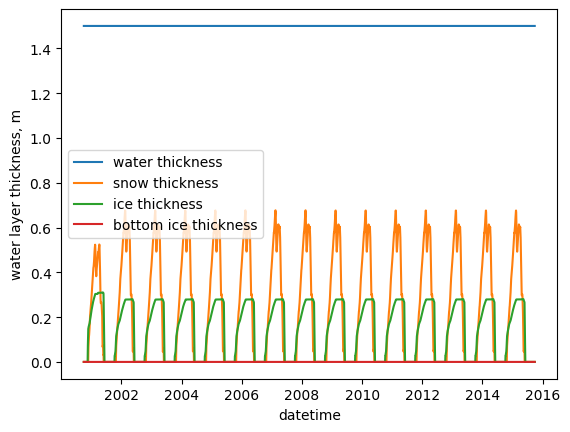

In [10]:
sns.lineplot(data=layers_burned, x='datetime', y='water layer thickness, m', label='water thickness')
#sns.lineplot(data=layers_burned, x='datetime', y='mean_mixed_layer_thickness', label='mixed layer thickness')
#sns.lineplot(data=layers_burned, x='datetime', y='mean_lower_layer_thickness', label='lower layer thickness')
sns.lineplot(data=layers_burned, x='datetime', y='snow layer thickness,  m', label='snow thickness')
sns.lineplot(data=layers_burned, x='datetime', y='ice layer thickness,   m', label='ice thickness')
sns.lineplot(data=layers_burned, x='datetime', y='bottom ice thickness,  m', label='bottom ice thickness')

In [11]:
layers_burned[(layers_burned['year']==2015) & (layers_burned['month']==1) & (layers_burned['day']==1)]

,year,month,day,hour,integration_time,"water layer thickness, m","W mixed layer thickness, m","E mixed layer thickness, m","S mixed layer thickness, m","N mixed layer thickness, m",...,"S lower layer thickness, m","N lower layer thickness, m","ice layer thickness, m","snow layer thickness, m","bottom ice thickness, m","reservoir volume, m**3","volume deficit (accumulated), m**3",datetime,mean_mixed_layer_thickness,mean_lower_layer_thickness
5204,2015,1,1,12.0,124920.0,1.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2226,0.4458,0.0,719.6,0.0,2015-01-01,0.0,0.0


<AxesSubplot: xlabel='datetime', ylabel='t_water'>

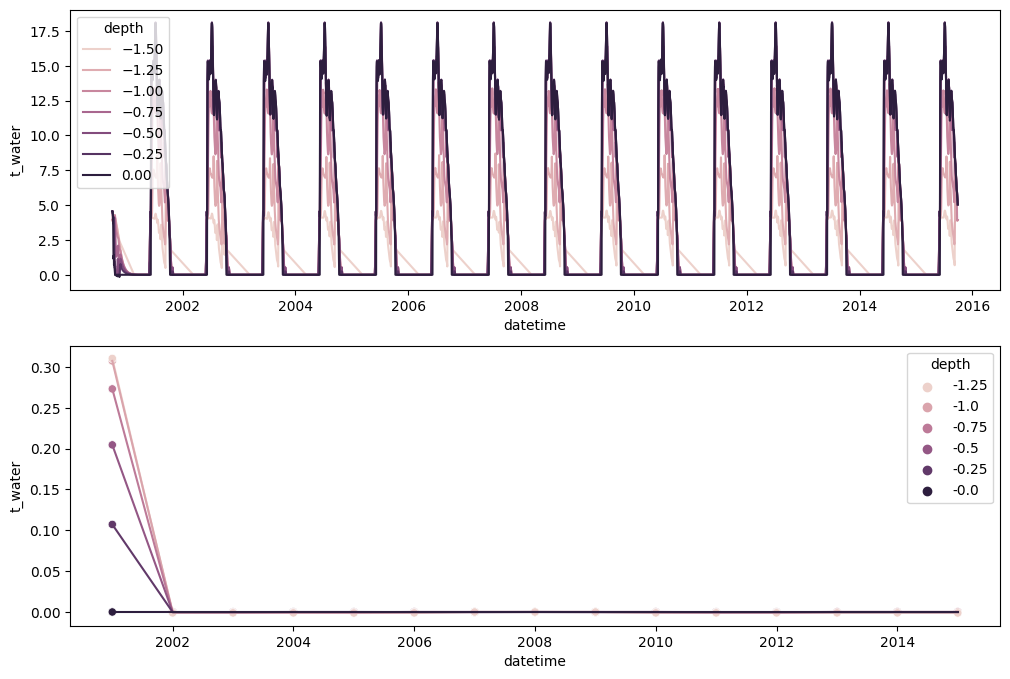

In [12]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=twater_burned[twater_burned['t_water']!=-999], x='datetime', y='t_water', hue = 'depth', ax=axes[0])
sns.lineplot(data=twater_burned[(twater_burned['t_water']!=-999) & (twater_burned['month']==1) & (twater_burned['day']==1)], 
             x='datetime', y='t_water', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=twater_burned[(twater_burned['t_water']!=-999) & (twater_burned['month']==1) & (twater_burned['day']==1)], 
             x='datetime', y='t_water', hue = 'depth', ax=axes[1])

In [13]:
twater_burned[(twater_burned['t_water']!=-999) & (twater_burned['year']==2015) & (twater_burned['month']==1) & (twater_burned['day']==1)]

,year,month,day,hour,integration_time,depth,t_water,datetime
36428,2015,1,1,12.0,5205.0,-0.00,-1.520111e-11,2015-01-01
36429,2015,1,1,12.0,5205.0,-0.25,-1.549029e-04,2015-01-01
36430,2015,1,1,12.0,5205.0,-0.50,-5.162519e-06,2015-01-01
36431,2015,1,1,12.0,5205.0,-0.75,-5.915750e-06,2015-01-01
36432,2015,1,1,12.0,5205.0,-1.00,-8.424662e-06,2015-01-01
36433,2015,1,1,12.0,5205.0,-1.25,-1.238806e-03,2015-01-01


<AxesSubplot: xlabel='datetime', ylabel='sal_water'>

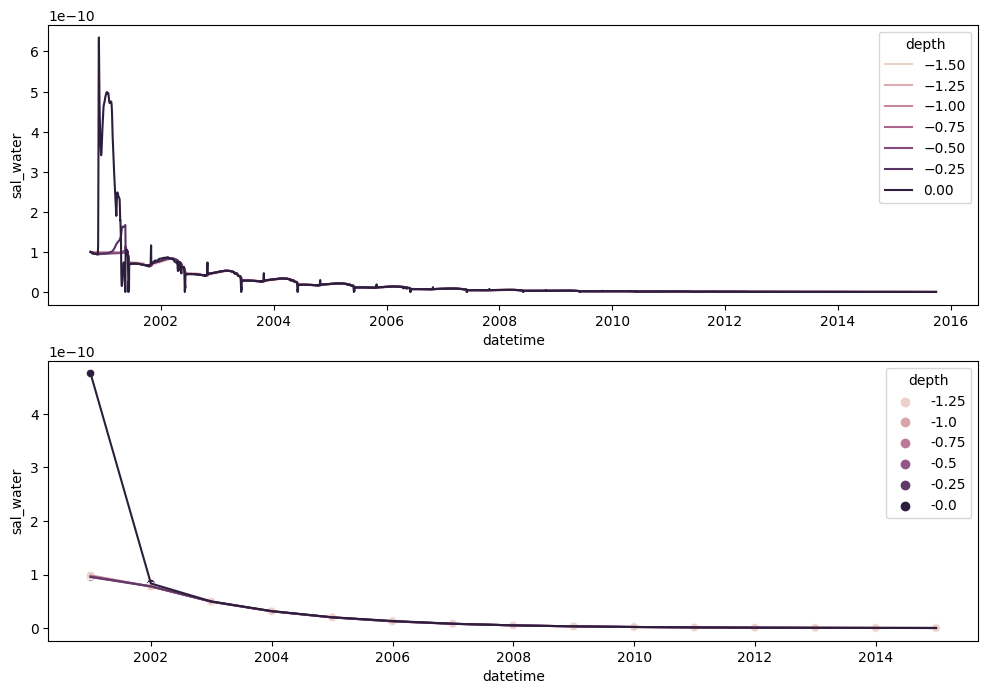

In [14]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=sal_water_burned[sal_water_burned['sal_water']!=-999], x='datetime', y='sal_water', hue = 'depth', ax=axes[0])
sns.lineplot(data=sal_water_burned[(sal_water_burned['sal_water']!=-999) & (sal_water_burned['month']==1) & (sal_water_burned['day']==1)], 
             x='datetime', y='sal_water', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=sal_water_burned[(sal_water_burned['sal_water']!=-999) & (sal_water_burned['month']==1) & (sal_water_burned['day']==1)], 
             x='datetime', y='sal_water', hue = 'depth', ax=axes[1])

In [15]:
sal_water_burned[(sal_water_burned['sal_water']!=-999) & (sal_water_burned['year']==2015) & (sal_water_burned['month']==1) & (sal_water_burned['day']==1)]

,year,month,day,hour,integration_time,depth,sal_water,datetime
36428,2015,1,1,12.0,5205.0,-0.00,2.279030e-13,2015-01-01
36429,2015,1,1,12.0,5205.0,-0.25,2.152387e-13,2015-01-01
36430,2015,1,1,12.0,5205.0,-0.50,2.145623e-13,2015-01-01
36431,2015,1,1,12.0,5205.0,-0.75,2.145162e-13,2015-01-01
36432,2015,1,1,12.0,5205.0,-1.00,2.144837e-13,2015-01-01
36433,2015,1,1,12.0,5205.0,-1.25,2.144601e-13,2015-01-01


<AxesSubplot: xlabel='datetime', ylabel='t_soil'>

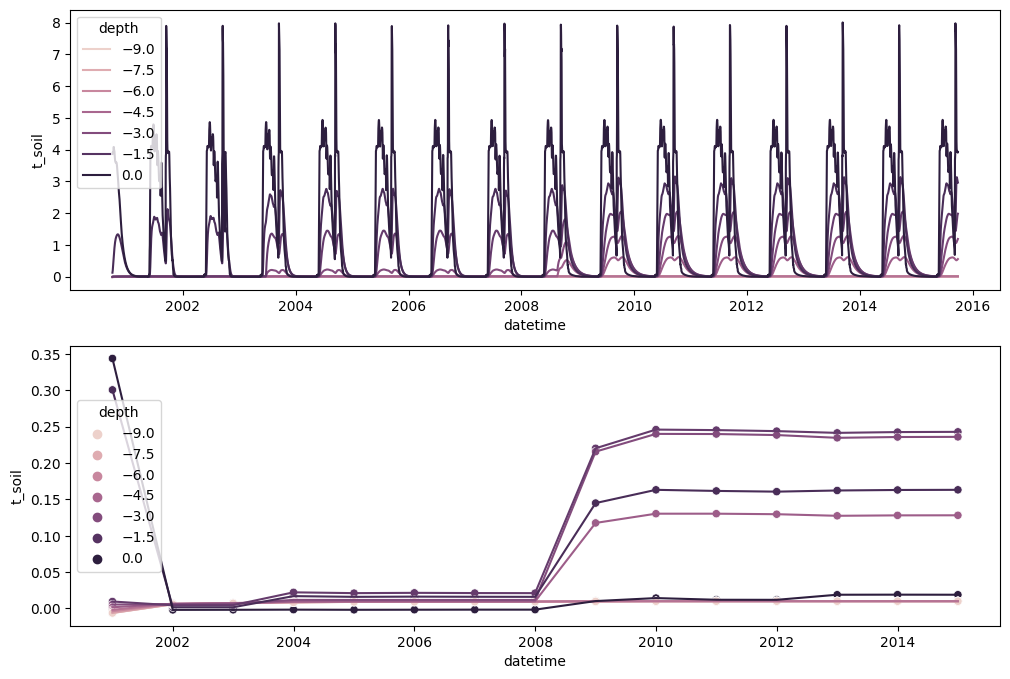

In [16]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=tsoil_burned[tsoil_burned['t_soil']!=-999], x='datetime', y='t_soil', hue = 'depth', ax=axes[0])
sns.lineplot(data=tsoil_burned[(tsoil_burned['t_soil']!=-999) & (tsoil_burned['month']==1) & (tsoil_burned['day']==1)], 
             x='datetime', y='t_soil', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=tsoil_burned[(tsoil_burned['t_soil']!=-999) & (tsoil_burned['month']==1) & (tsoil_burned['day']==1)], 
             x='datetime', y='t_soil', hue = 'depth', ax=axes[1])

In [17]:
tsoil_burned[(tsoil_burned['t_soil']!=-999) & (tsoil_burned['year']==2015) & (tsoil_burned['month']==1) & (tsoil_burned['day']==1)]

,year,month,day,hour,integration_time,depth,t_soil,datetime
57244,2015,1,1,12.0,5205.0,-0.0,0.0189,2015-01-01
57245,2015,1,1,12.0,5205.0,-1.0,0.1631,2015-01-01
57246,2015,1,1,12.0,5205.0,-2.0,0.2428,2015-01-01
57247,2015,1,1,12.0,5205.0,-3.0,0.2359,2015-01-01
57248,2015,1,1,12.0,5205.0,-4.0,0.1281,2015-01-01
57249,2015,1,1,12.0,5205.0,-5.0,0.0100,2015-01-01
57250,2015,1,1,12.0,5205.0,-6.0,0.0100,2015-01-01
57251,2015,1,1,12.0,5205.0,-7.0,0.0100,2015-01-01
57252,2015,1,1,12.0,5205.0,-8.0,0.0100,2015-01-01
57253,2015,1,1,12.0,5205.0,-9.0,0.0100,2015-01-01


<AxesSubplot: xlabel='datetime', ylabel='ch4'>

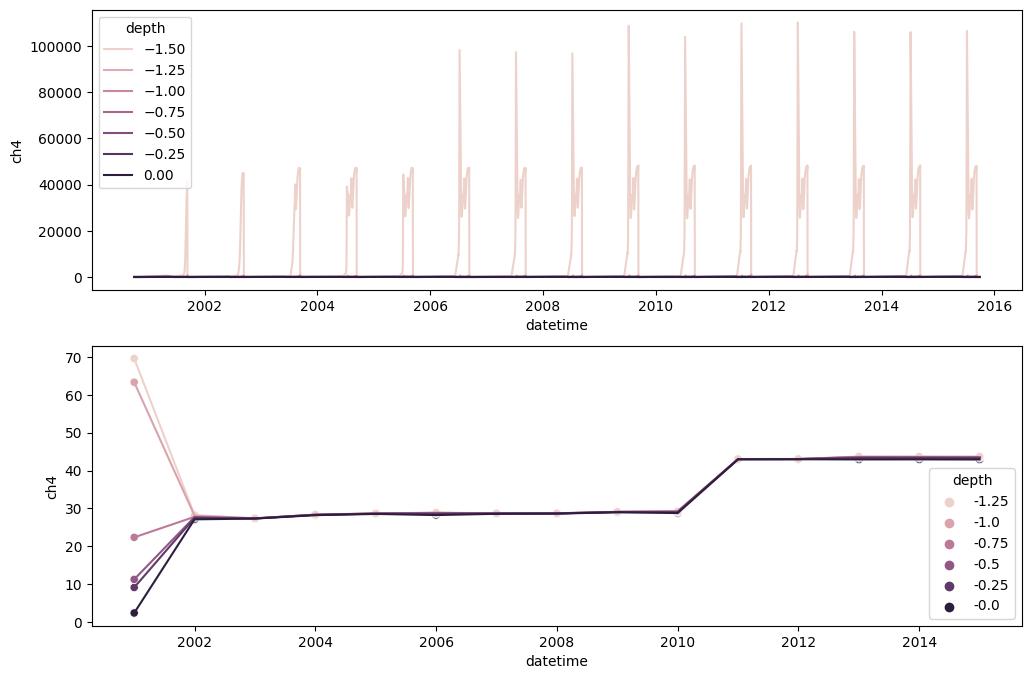

In [18]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=ch4_burned[ch4_burned['ch4']!=-999], x='datetime', y='ch4', hue = 'depth', ax=axes[0])
sns.lineplot(data=ch4_burned[(ch4_burned['ch4']!=-999) & (ch4_burned['month']==1) & (ch4_burned['day']==1)], 
             x='datetime', y='ch4', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=ch4_burned[(ch4_burned['ch4']!=-999) & (ch4_burned['month']==1) & (ch4_burned['day']==1)], 
             x='datetime', y='ch4', hue = 'depth', ax=axes[1])

In [19]:
ch4_unburned[(ch4_unburned['ch4']!=-999) & (ch4_unburned['year']==2015) & (ch4_unburned['month']==1) & (ch4_unburned['day']==1)]

,year,month,day,hour,integration_time,depth,ch4,datetime
62448,2015,1,1,12.0,5205.0,-0.00,19.324145,2015-01-01
62449,2015,1,1,12.0,5205.0,-0.25,19.367904,2015-01-01
62450,2015,1,1,12.0,5205.0,-0.50,19.378928,2015-01-01
62451,2015,1,1,12.0,5205.0,-0.75,19.391636,2015-01-01
62452,2015,1,1,12.0,5205.0,-1.00,19.397866,2015-01-01
62453,2015,1,1,12.0,5205.0,-1.25,19.401059,2015-01-01
62454,2015,1,1,12.0,5205.0,-1.50,19.404656,2015-01-01
62455,2015,1,1,12.0,5205.0,-1.75,19.408940,2015-01-01
62456,2015,1,1,12.0,5205.0,-2.00,19.413239,2015-01-01
62457,2015,1,1,12.0,5205.0,-2.25,19.417611,2015-01-01


<AxesSubplot: xlabel='datetime', ylabel='co2'>

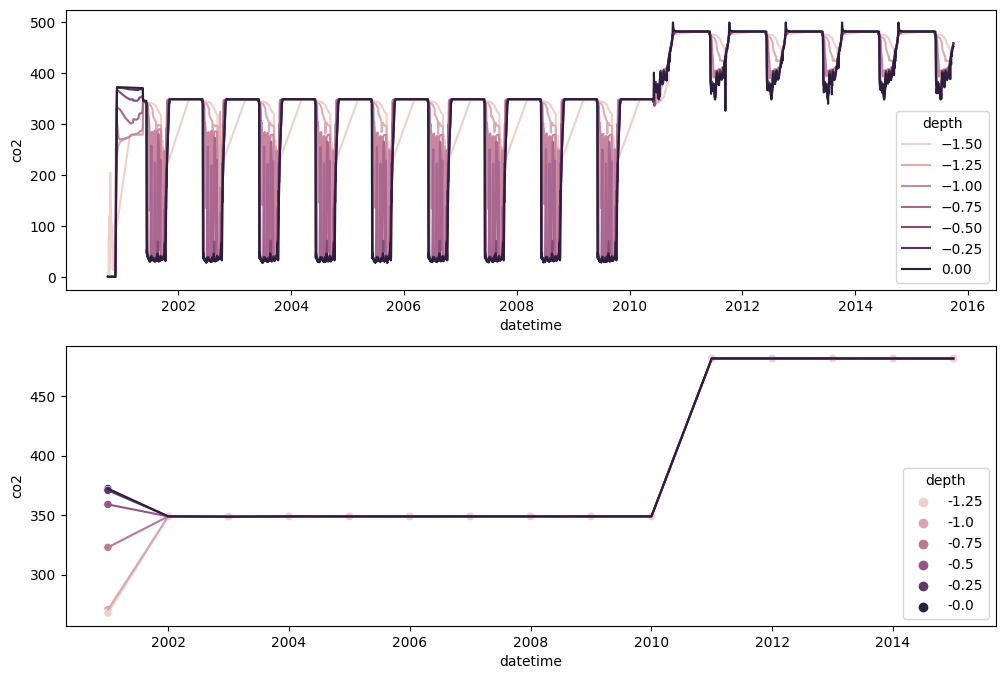

In [20]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=co2_burned[co2_burned['co2']!=-999], x='datetime', y='co2', hue = 'depth', ax=axes[0])
sns.lineplot(data=co2_burned[(co2_burned['co2']!=-999) & (co2_burned['month']==1) & (co2_burned['day']==1)], 
             x='datetime', y='co2', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=co2_burned[(co2_burned['co2']!=-999) & (co2_burned['month']==1) & (co2_burned['day']==1)], 
             x='datetime', y='co2', hue = 'depth', ax=axes[1])

In [21]:
co2_burned[(co2_burned['co2']!=-999) & (co2_burned['year']==2010) & (co2_burned['month']==1) & (co2_burned['day']==1)]

,year,month,day,hour,integration_time,depth,co2,datetime
23646,2010,1,1,12.0,3379.0,-0.00,348.855398,2010-01-01
23647,2010,1,1,12.0,3379.0,-0.25,348.855583,2010-01-01
23648,2010,1,1,12.0,3379.0,-0.50,348.855405,2010-01-01
23649,2010,1,1,12.0,3379.0,-0.75,348.855405,2010-01-01
23650,2010,1,1,12.0,3379.0,-1.00,348.855830,2010-01-01
23651,2010,1,1,12.0,3379.0,-1.25,348.856555,2010-01-01


<AxesSubplot: xlabel='datetime', ylabel='do'>

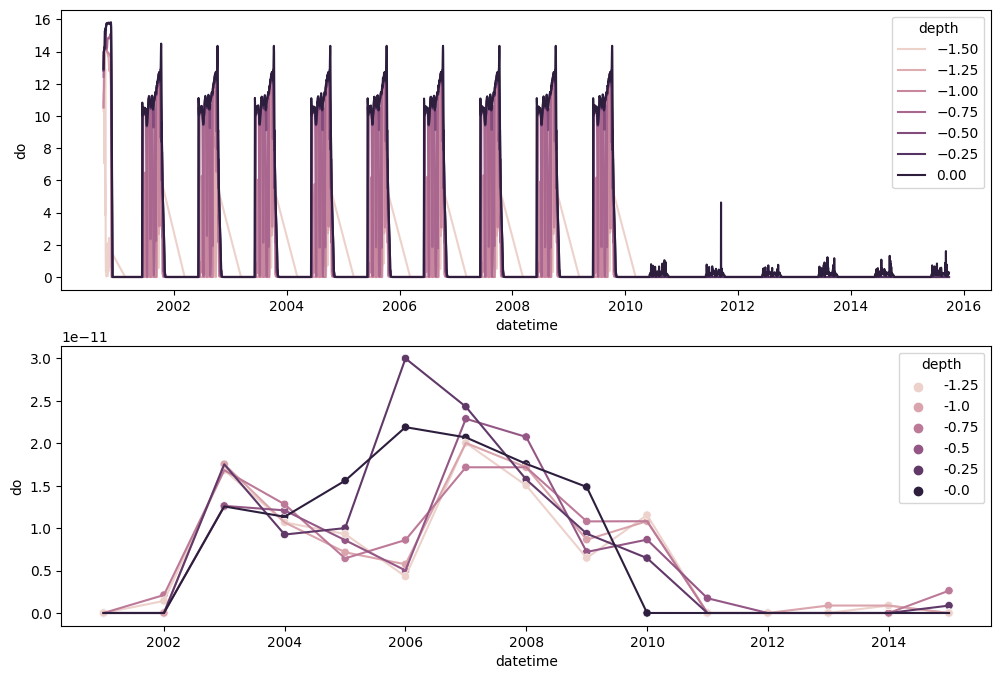

In [22]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=do_burned[do_burned['do']!=-999], x='datetime', y='do', hue = 'depth', ax=axes[0])
sns.lineplot(data=do_burned[(do_burned['do']!=-999) & (do_burned['month']==1) & (do_burned['day']==1)], 
             x='datetime', y='do', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=do_burned[(do_burned['do']!=-999) & (do_burned['month']==1) & (do_burned['day']==1)], 
             x='datetime', y='do', hue = 'depth', ax=axes[1])

In [23]:
do_burned[(do_burned['do']!=-999) & (do_burned['year']==2010) & (do_burned['month']==1) & (do_burned['day']==1)]

,year,month,day,hour,integration_time,depth,do,datetime
23646,2010,1,1,12.0,3379.0,-0.00,1.312110e-15,2010-01-01
23647,2010,1,1,12.0,3379.0,-0.25,6.470619e-12,2010-01-01
23648,2010,1,1,12.0,3379.0,-0.50,8.647548e-12,2010-01-01
23649,2010,1,1,12.0,3379.0,-0.75,1.081669e-11,2010-01-01
23650,2010,1,1,12.0,3379.0,-1.00,1.082072e-11,2010-01-01
23651,2010,1,1,12.0,3379.0,-1.25,1.154483e-11,2010-01-01


# Unburned Plots

<AxesSubplot: xlabel='datetime', ylabel='water layer thickness, m'>

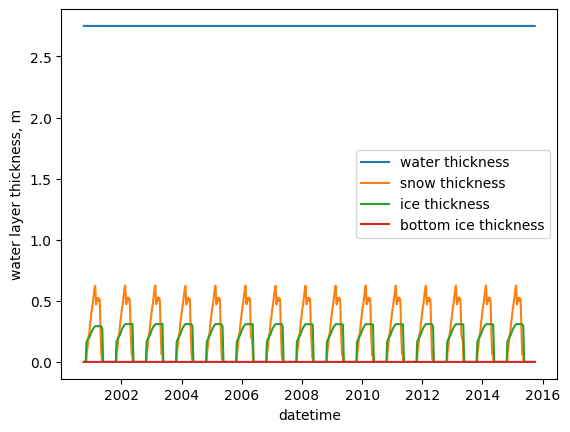

In [24]:
sns.lineplot(data=layers_unburned, x='datetime', y='water layer thickness, m', label='water thickness')
#sns.lineplot(data=layers_burned, x='datetime', y='mean_mixed_layer_thickness', label='mixed layer thickness')
#sns.lineplot(data=layers_burned, x='datetime', y='mean_lower_layer_thickness', label='lower layer thickness')
sns.lineplot(data=layers_unburned, x='datetime', y='snow layer thickness,  m', label='snow thickness')
sns.lineplot(data=layers_unburned, x='datetime', y='ice layer thickness,   m', label='ice thickness')
sns.lineplot(data=layers_unburned, x='datetime', y='bottom ice thickness,  m', label='bottom ice thickness')

In [25]:
layers_unburned[(layers_unburned['year']==2010) & (layers_unburned['month']==1) & (layers_unburned['day']==1)]

,year,month,day,hour,integration_time,"water layer thickness, m","W mixed layer thickness, m","E mixed layer thickness, m","S mixed layer thickness, m","N mixed layer thickness, m",...,"S lower layer thickness, m","N lower layer thickness, m","ice layer thickness, m","snow layer thickness, m","bottom ice thickness, m","reservoir volume, m**3","volume deficit (accumulated), m**3",datetime,mean_mixed_layer_thickness,mean_lower_layer_thickness
3378,2010,1,1,12.0,81096.0,2.75,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2583,0.4094,0.0,5916.0,0.0,2010-01-01,0.0,0.0


<AxesSubplot: xlabel='datetime', ylabel='t_water'>

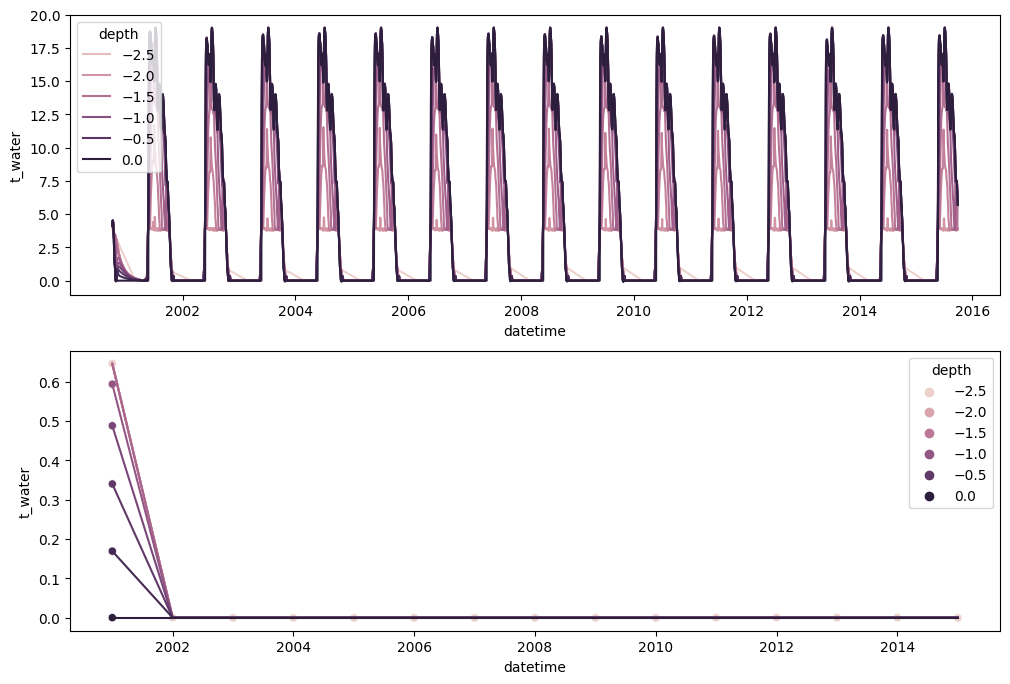

In [26]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=twater_unburned[twater_unburned['t_water']!=-999], x='datetime', y='t_water', hue = 'depth', ax=axes[0])
sns.lineplot(data=twater_unburned[(twater_unburned['t_water']!=-999) & (twater_unburned['month']==1) & (twater_unburned['day']==1)], 
             x='datetime', y='t_water', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=twater_unburned[(twater_unburned['t_water']!=-999) & (twater_unburned['month']==1) & (twater_unburned['day']==1)], 
             x='datetime', y='t_water', hue = 'depth', ax=axes[1])

<AxesSubplot: xlabel='datetime', ylabel='t_water'>

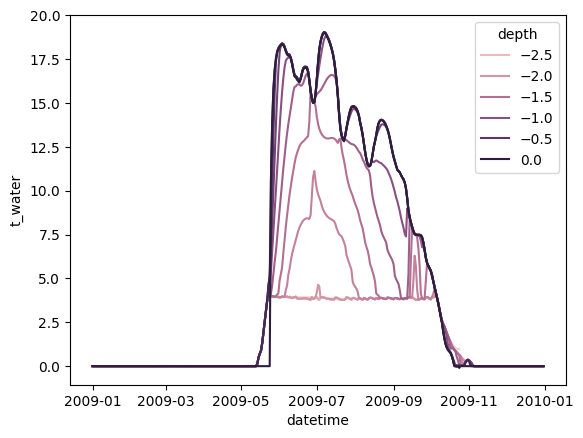

In [27]:
sns.lineplot(data=twater_unburned[(twater_unburned['t_water']!=-999)&(twater_unburned['year']==2009)], x='datetime', y='t_water', hue = 'depth')

In [28]:
twater_unburned[(twater_unburned['t_water']!=-999) & (twater_unburned['year']==2010) & (twater_unburned['month']==1) & (twater_unburned['day']==1)]

,year,month,day,hour,integration_time,depth,t_water,datetime
40536,2010,1,1,12.0,3379.0,-0.00,-1.482624e-09,2010-01-01
40537,2010,1,1,12.0,3379.0,-0.25,-1.838405e-06,2010-01-01
40538,2010,1,1,12.0,3379.0,-0.50,-1.317636e-06,2010-01-01
40539,2010,1,1,12.0,3379.0,-0.75,-3.301060e-05,2010-01-01
40540,2010,1,1,12.0,3379.0,-1.00,-4.344085e-05,2010-01-01
40541,2010,1,1,12.0,3379.0,-1.25,-8.041077e-05,2010-01-01
40542,2010,1,1,12.0,3379.0,-1.50,-8.723475e-05,2010-01-01
40543,2010,1,1,12.0,3379.0,-1.75,-9.581134e-05,2010-01-01
40544,2010,1,1,12.0,3379.0,-2.00,-1.416518e-04,2010-01-01
40545,2010,1,1,12.0,3379.0,-2.25,-4.476529e-04,2010-01-01


<AxesSubplot: xlabel='datetime', ylabel='sal_water'>

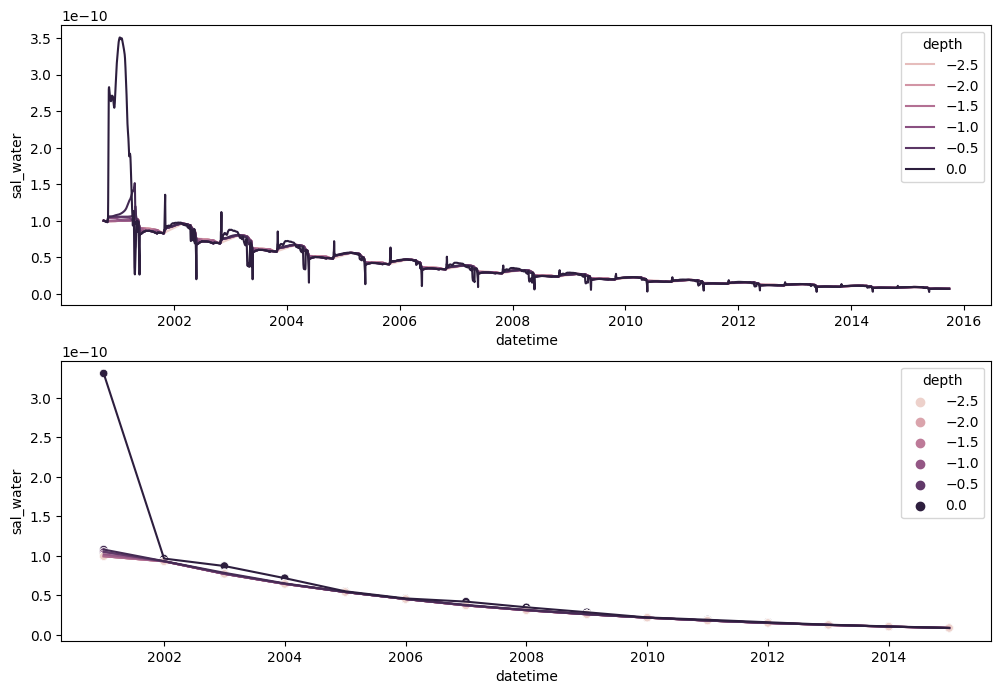

In [29]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=sal_water_unburned[sal_water_unburned['sal_water']!=-999], x='datetime', y='sal_water', hue = 'depth', ax=axes[0])
sns.lineplot(data=sal_water_unburned[(sal_water_unburned['sal_water']!=-999) & (sal_water_unburned['month']==1) & (sal_water_unburned['day']==1)], 
             x='datetime', y='sal_water', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=sal_water_unburned[(sal_water_unburned['sal_water']!=-999) & (sal_water_unburned['month']==1) & (sal_water_unburned['day']==1)], 
             x='datetime', y='sal_water', hue = 'depth', ax=axes[1])

In [30]:
sal_water_unburned[(sal_water_unburned['sal_water']!=-999) & (sal_water_unburned['year']==2010) & (sal_water_unburned['month']==1) & (sal_water_unburned['day']==1)]

,year,month,day,hour,integration_time,depth,sal_water,datetime
40536,2010,1,1,12.0,3379.0,-0.00,2.222823e-11,2010-01-01
40537,2010,1,1,12.0,3379.0,-0.25,2.194619e-11,2010-01-01
40538,2010,1,1,12.0,3379.0,-0.50,2.193503e-11,2010-01-01
40539,2010,1,1,12.0,3379.0,-0.75,2.192964e-11,2010-01-01
40540,2010,1,1,12.0,3379.0,-1.00,2.192761e-11,2010-01-01
40541,2010,1,1,12.0,3379.0,-1.25,2.192710e-11,2010-01-01
40542,2010,1,1,12.0,3379.0,-1.50,2.192667e-11,2010-01-01
40543,2010,1,1,12.0,3379.0,-1.75,2.192637e-11,2010-01-01
40544,2010,1,1,12.0,3379.0,-2.00,2.192619e-11,2010-01-01
40545,2010,1,1,12.0,3379.0,-2.25,2.192609e-11,2010-01-01


<AxesSubplot: xlabel='datetime', ylabel='t_soil'>

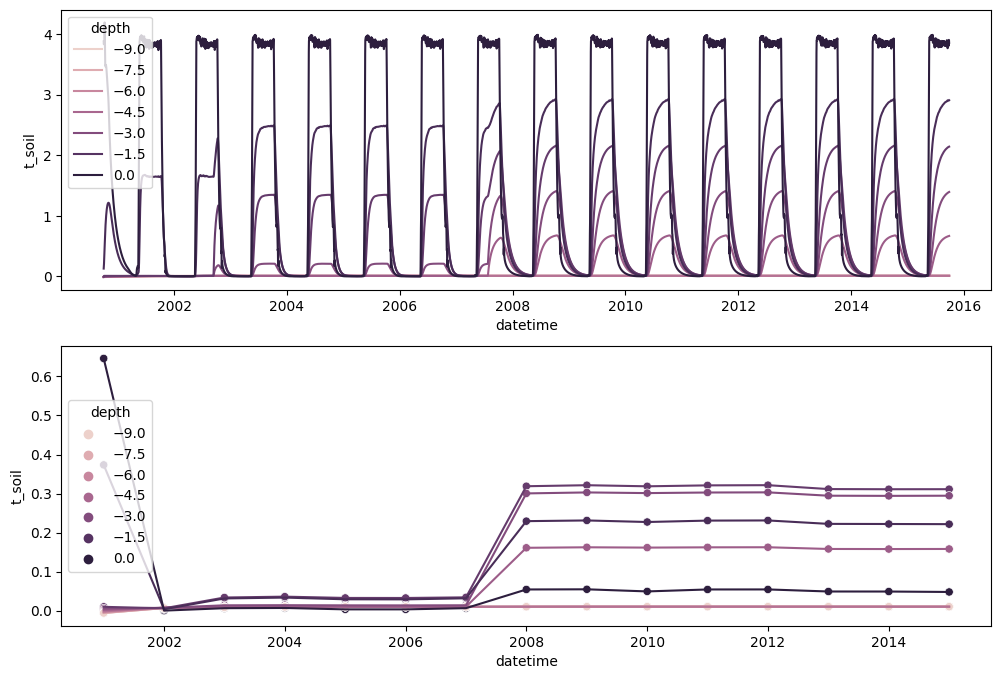

In [31]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=tsoil_unburned[tsoil_unburned['t_soil']!=-999], x='datetime', y='t_soil', hue = 'depth', ax=axes[0])
sns.lineplot(data=tsoil_unburned[(tsoil_unburned['t_soil']!=-999) & (tsoil_unburned['month']==1) & (tsoil_unburned['day']==1)], 
             x='datetime', y='t_soil', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=tsoil_unburned[(tsoil_unburned['t_soil']!=-999) & (tsoil_unburned['month']==1) & (tsoil_unburned['day']==1)], 
             x='datetime', y='t_soil', hue = 'depth', ax=axes[1])

In [32]:
tsoil_unburned[(tsoil_unburned['t_soil']!=-999) & (tsoil_unburned['year']==2010) & (tsoil_unburned['month']==1) & (tsoil_unburned['day']==1)]

,year,month,day,hour,integration_time,depth,t_soil,datetime
37158,2010,1,1,12.0,3379.0,-0.0,0.0491,2010-01-01
37159,2010,1,1,12.0,3379.0,-1.0,0.2270,2010-01-01
37160,2010,1,1,12.0,3379.0,-2.0,0.3185,2010-01-01
37161,2010,1,1,12.0,3379.0,-3.0,0.3011,2010-01-01
37162,2010,1,1,12.0,3379.0,-4.0,0.1614,2010-01-01
37163,2010,1,1,12.0,3379.0,-5.0,0.0100,2010-01-01
37164,2010,1,1,12.0,3379.0,-6.0,0.0100,2010-01-01
37165,2010,1,1,12.0,3379.0,-7.0,0.0100,2010-01-01
37166,2010,1,1,12.0,3379.0,-8.0,0.0100,2010-01-01
37167,2010,1,1,12.0,3379.0,-9.0,0.0100,2010-01-01


<AxesSubplot: xlabel='datetime', ylabel='ch4'>

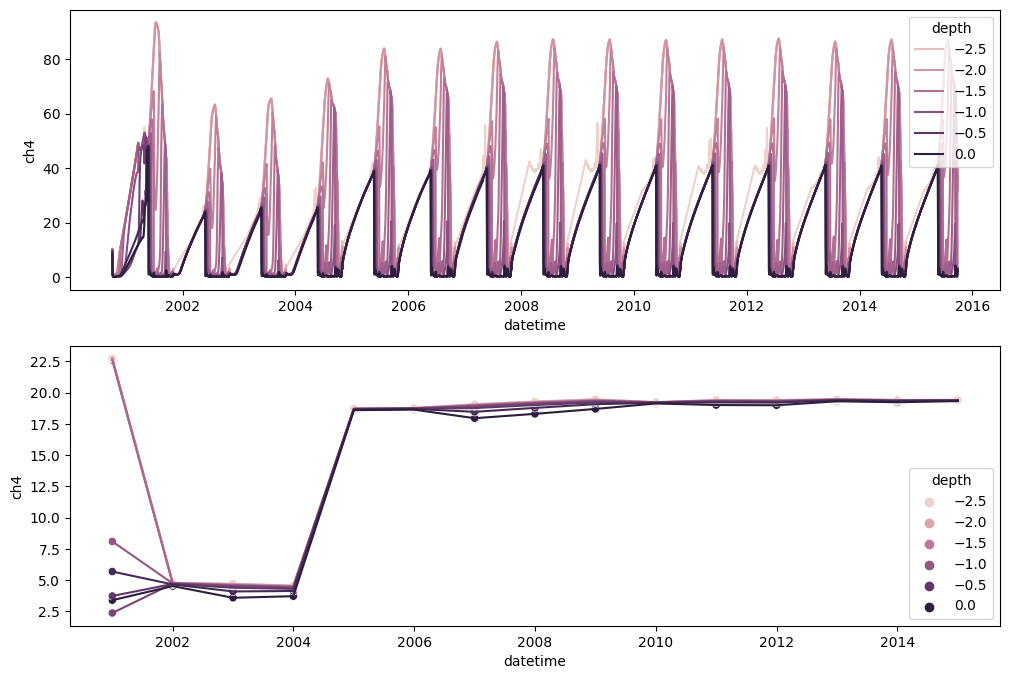

In [33]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=ch4_unburned[ch4_unburned['ch4']!=-999], x='datetime', y='ch4', hue = 'depth', ax=axes[0])
sns.lineplot(data=ch4_unburned[(ch4_unburned['ch4']!=-999) & (ch4_unburned['month']==1) & (ch4_unburned['day']==1)], 
             x='datetime', y='ch4', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=ch4_unburned[(ch4_unburned['ch4']!=-999) & (ch4_unburned['month']==1) & (ch4_unburned['day']==1)], 
             x='datetime', y='ch4', hue = 'depth', ax=axes[1])

In [34]:
ch4_unburned[(ch4_unburned['ch4']!=-999) & (ch4_unburned['year']==2010) & (ch4_unburned['month']==1) & (ch4_unburned['day']==1)]

,year,month,day,hour,integration_time,depth,ch4,datetime
40536,2010,1,1,12.0,3379.0,-0.00,19.133667,2010-01-01
40537,2010,1,1,12.0,3379.0,-0.25,19.183476,2010-01-01
40538,2010,1,1,12.0,3379.0,-0.50,19.196506,2010-01-01
40539,2010,1,1,12.0,3379.0,-0.75,19.208515,2010-01-01
40540,2010,1,1,12.0,3379.0,-1.00,19.216943,2010-01-01
40541,2010,1,1,12.0,3379.0,-1.25,19.220367,2010-01-01
40542,2010,1,1,12.0,3379.0,-1.50,19.224760,2010-01-01
40543,2010,1,1,12.0,3379.0,-1.75,19.229217,2010-01-01
40544,2010,1,1,12.0,3379.0,-2.00,19.233572,2010-01-01
40545,2010,1,1,12.0,3379.0,-2.25,19.237967,2010-01-01


<AxesSubplot: xlabel='datetime', ylabel='co2'>

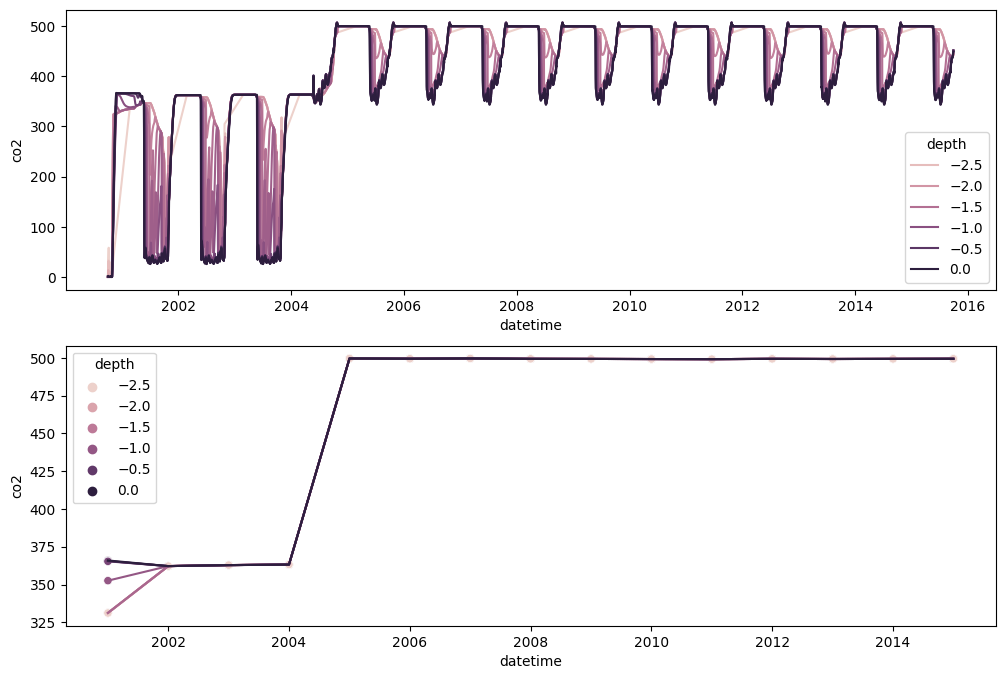

In [35]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=co2_unburned[co2_unburned['co2']!=-999], x='datetime', y='co2', hue = 'depth', ax=axes[0])
sns.lineplot(data=co2_unburned[(co2_unburned['co2']!=-999) & (co2_unburned['month']==1) & (co2_unburned['day']==1)], 
             x='datetime', y='co2', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=co2_unburned[(co2_unburned['co2']!=-999) & (co2_unburned['month']==1) & (co2_unburned['day']==1)], 
             x='datetime', y='co2', hue = 'depth', ax=axes[1])

In [36]:
co2_unburned[(co2_unburned['co2']!=-999) & (co2_unburned['year']==2010) & (co2_unburned['month']==1) & (co2_unburned['day']==1)]

,year,month,day,hour,integration_time,depth,co2,datetime
40536,2010,1,1,12.0,3379.0,-0.00,499.136217,2010-01-01
40537,2010,1,1,12.0,3379.0,-0.25,499.136220,2010-01-01
40538,2010,1,1,12.0,3379.0,-0.50,499.136219,2010-01-01
40539,2010,1,1,12.0,3379.0,-0.75,499.136267,2010-01-01
40540,2010,1,1,12.0,3379.0,-1.00,499.136283,2010-01-01
40541,2010,1,1,12.0,3379.0,-1.25,499.136339,2010-01-01
40542,2010,1,1,12.0,3379.0,-1.50,499.136349,2010-01-01
40543,2010,1,1,12.0,3379.0,-1.75,499.136362,2010-01-01
40544,2010,1,1,12.0,3379.0,-2.00,499.136431,2010-01-01
40545,2010,1,1,12.0,3379.0,-2.25,499.136893,2010-01-01


<AxesSubplot: xlabel='datetime', ylabel='do'>

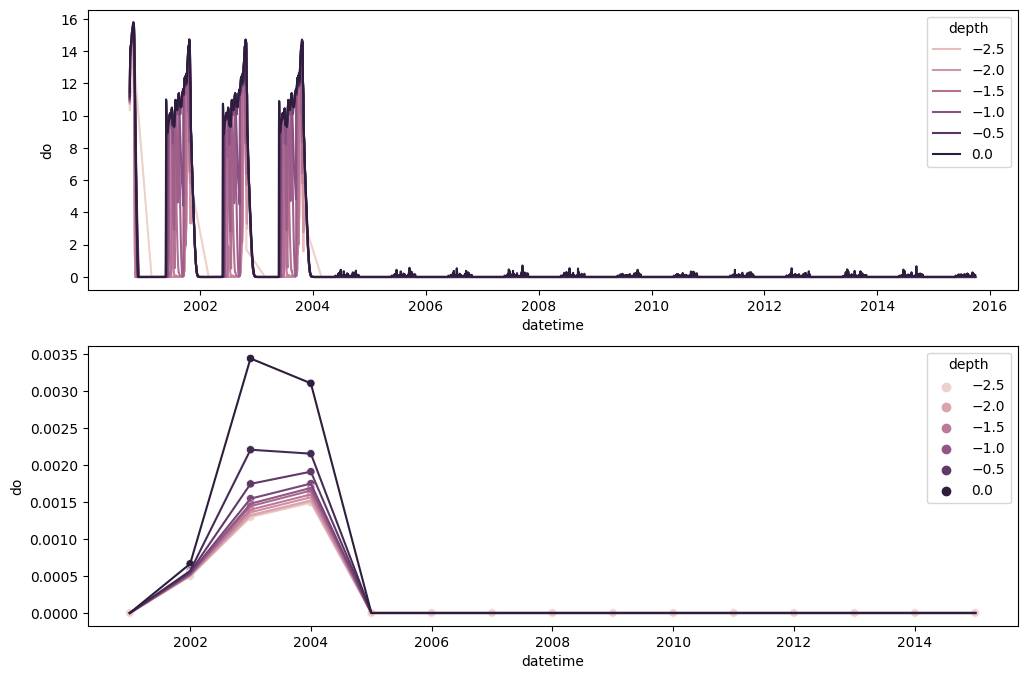

In [37]:
fig, axes=plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data=do_unburned[do_unburned['do']!=-999], x='datetime', y='do', hue = 'depth', ax=axes[0])
sns.lineplot(data=do_unburned[(do_unburned['do']!=-999) & (do_unburned['month']==1) & (do_unburned['day']==1)], 
             x='datetime', y='do', hue = 'depth', ax=axes[1], legend=False)
sns.scatterplot(data=do_unburned[(do_unburned['do']!=-999) & (do_unburned['month']==1) & (do_unburned['day']==1)], 
             x='datetime', y='do', hue = 'depth', ax=axes[1])

In [38]:
do_unburned[(do_unburned['do']!=-999) & (do_unburned['year']==2010) & (do_unburned['month']==1) & (do_unburned['day']==1)]

,year,month,day,hour,integration_time,depth,do,datetime
40536,2010,1,1,12.0,3379.0,-0.00,3.200000e-19,2010-01-01
40537,2010,1,1,12.0,3379.0,-0.25,0.000000e+00,2010-01-01
40538,2010,1,1,12.0,3379.0,-0.50,1.337017e-12,2010-01-01
40539,2010,1,1,12.0,3379.0,-0.75,0.000000e+00,2010-01-01
40540,2010,1,1,12.0,3379.0,-1.00,1.003866e-12,2010-01-01
40541,2010,1,1,12.0,3379.0,-1.25,0.000000e+00,2010-01-01
40542,2010,1,1,12.0,3379.0,-1.50,0.000000e+00,2010-01-01
40543,2010,1,1,12.0,3379.0,-1.75,0.000000e+00,2010-01-01
40544,2010,1,1,12.0,3379.0,-2.00,0.000000e+00,2010-01-01
40545,2010,1,1,12.0,3379.0,-2.25,0.000000e+00,2010-01-01
